## Lab 3
### Student Name: Aagnay Kariyal
### Student ID: 8830232

***

## Univariate Linear Regression Model using Diabetes Dataset

We use the below code to import all the necessary libraries

In [1]:
import numpy
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
import pandas as pd

### 1) Frame the problem and look at the big picture

***

We are looking through a diabetes disease dataset from SciKit learn to understand if there is any correlation between BMI body mass index and disease progression. In this case, diabetes. <br>
In the current dataset we consider BMI to be our Feature / Independent Variable and the quantitative measure of disease progression, that is diabetes to be our Target / Dependent variable.

### 2) Get Data

***

From the below code chunk, we are extracting the data from the SciKit learn sample dataset and we load them into two different numpy arrays. The diabetes_X would contain all the Feature variables and diabetes_y would contain the Target variable.

In [2]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame = True)

By using the 'as_frame' attribute, we allow the dataset to be load as a pandas dataframe.
We use a pandas data frame for easier plotting

### 3) Data Exploration

***


In [3]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


From printing out diabetes_X, we are able to recognize that diabetes_X consists of all the feature variables, which consists of 442 rows and 10 columns. This also falls in line with the documentation by SciKit learn.

In [4]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

From printing out diabetes_y, we were able to understand that it consists of only one column with 442 rows and consists of the target variable, that is the disease progression of diabetes.

We use the below code to concatenate the feature and target variables together to find the correlation between them using a heatmap

In [5]:
diabetes_data = pd.concat([diabetes_X, diabetes_y], axis = 1, join = 'inner')
diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


We then print out a heatmap to figure out any correlation between the variables

Text(0.5, 1.0, 'Heatmap to find Correlations')

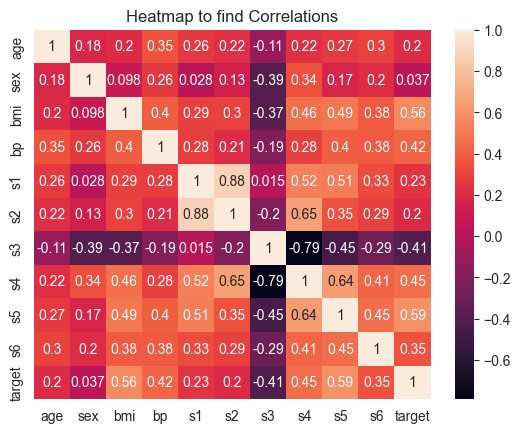

In [6]:
sns.heatmap(diabetes_data.corr(method="spearman"), annot=True)
plt.title('Heatmap to find Correlations')

From the heatmap, we are able to realize that for the Target variable, the highest positive correlation are with s5 (possibly log of serum triglycerides level) and Body Mass Index. <br>
Which means that as the independent variables, BMI gets higher, the disease progression of diabetes would increase as well. 

Text(0.5, 1.0, 'Scatterplot to find correlation between BMI and Disease progression')

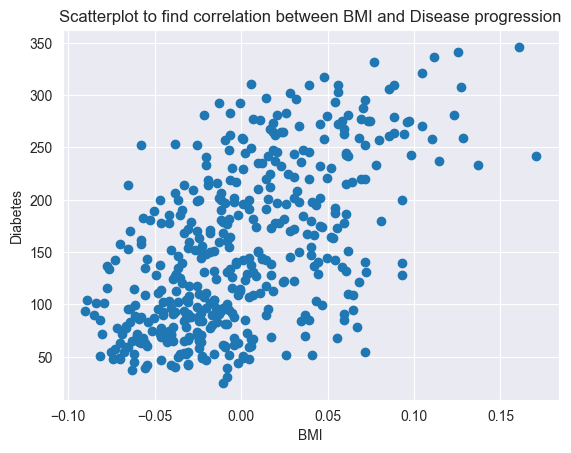

In [7]:
plt.scatter(diabetes_X['bmi'], diabetes_y)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Scatterplot to find correlation between BMI and Disease progression')

From the above graph we can find some correlation between the data which falls in line with the analysis that we made from the heatmap

We then extract just the BMI variable from the diabetes_X array into a new array called sample_X after reshaping it to fit into our linear regression model.

In [8]:
sample_X = np.array(diabetes_X["bmi"]).reshape(-1, 1)

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

### 6) Fine-tune your models and combine them into a great solution

***

In the below code chunk we split the data into Train and Test sets. <br>
We use 80% of the data for training and the rest 20% for testing.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(sample_X, diabetes_y, test_size=0.2, random_state=0)

In the below code chunk we create the Linear Regression model and then fit the model with the training data.

In [10]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

We then make predictions using the dataset for the Target variable and find out the Coefficient and Intercept

In [11]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [12]:
# The coefficients
print('Coefficient: \n', model.coef_)
print('intercept: ', model.intercept_)

Coefficient: 
 [981.65543614]
intercept:  152.28824927379569


### 7) Present your solution

***

We now then use the test model and the predicted model to find out the Loss functions

In [13]:
# The mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))

Mean squared error: 4150.68
Mean absolute error: 52.94


From the above output, we can see that there are high errors for the Mean Squared Error and the Mean Absolute Error for this Univariate Linear Regression Model. This gives us an insight to the fit of this model for this particular data.

We then plot the outputs to gain an insight to how the data is graphically

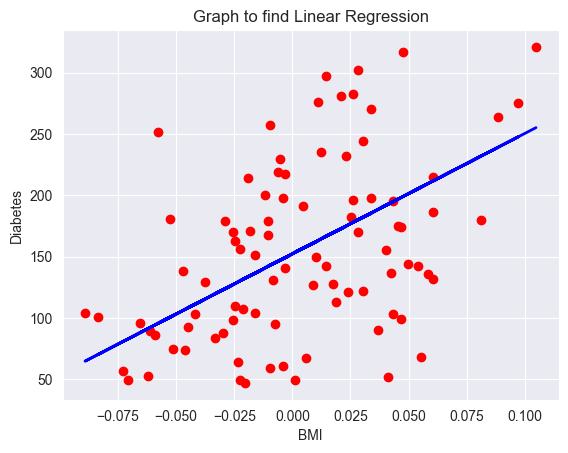

In [14]:
# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title('Graph to find Linear Regression')
plt.show()

From the above observations, it's evident that the dataset is not a good fit for the Linear Regression Model as there are high errors with the Loss function and the data points in the graph are extremely scattered which shows us the data points have high variance with each other to execute a proper linear regression model.